In [1]:
import os
currentPath = os.getcwd()
os.chdir('./')

In [2]:
print(currentPath)

C:\Users\user\Desktop\deeplearning\pickleandetc


In [3]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test)=\
   load_mnist(flatten=True, normalize=False)
    
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

ModuleNotFoundError: No module named 'dataset'

In [4]:
(x_train, t_train), (x_test, t_test)=\
   load_mnist(flatten=False, normalize=False)
    
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[1]
label = t_train[1]
print(label)

print(img.shape)            
img = img.reshape(28,28)   
print(img.shape)

img_show(img)


0
(784,)
(28, 28)


In [6]:
print(np.uint8(255), np.uint8(256), np.uint8(257))

255 0 1


In [7]:
print(np.int8(127), np.int8(128), np.int8(129))

127 -128 -127


In [8]:
print(np.int8(130), np.int8(255), np.int8(256), np.int8(257)) 

-126 -1 0 1


In [9]:
np.set_printoptions(linewidth=115, threshold=1000)
print(x_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0

In [10]:
np.set_printoptions(linewidth=200, threshold=1000)
print(x_train[1].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [11]:
import pickle
import numpy as np
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [12]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) 
    if p == t[i]:
        accuracy_cnt +=1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### MNIST batch

In [13]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### MNIST imshow.py

In [ ]:
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

plt.figure()
plt.imshow(x_train[0][0])
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i][0], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

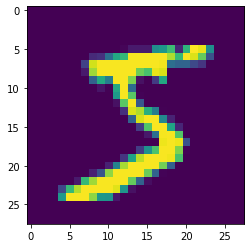

<Figure size 20160x20160 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

plt.figure()
plt.imshow(x_train[0][0])
plt.figure(figsize=(280,280))
plt.show()

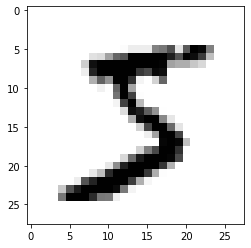

In [16]:
plt.imshow(x_train[0][0], cmap=plt.cm.binary)